In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

def load_city_data(city, date):
    base_folder = 'C:\\Users\\mvk\\Documents\\DATA_school\\thesis\\data_new'
    base_path = os.path.join(base_folder, city, date)
    listings = pd.read_csv(f"{base_path}/listings.csv", low_memory=False)
    calendar = pd.read_csv(f"{base_path}/calendar.csv", low_memory=False)
    neighborhoods = pd.read_csv(f"{base_path}/neighbourhoods.csv")
    return listings, calendar, neighborhoods


# Define the dates for each city
city_dates = {
    'amsterdam': ['2023-06-05', '2023-09-03', '2023-12-12', '2024-03-11', '2024-06-10', '2024-09-05'],
    'barcelona': ['2023-06-10', '2023-09-06', '2023-12-13', '2024-03-20', '2024-06-15', '2024-09-06'],
    'berlin': ['2023-06-22', '2023-09-16', '2023-12-18', '2024-03-24', '2024-06-22', None],  # Berlin has only 5 dates
    'london': ['2023-06-08', '2023-09-06', '2023-12-10', '2024-03-19', '2024-06-14', '2024-09-06'],
    'paris': ['2023-06-06', '2023-09-04', '2023-12-12', '2024-03-16', '2024-06-10', '2024-09-06'],
    'rome': ['2023-06-10', '2023-09-07', '2023-12-15', '2024-03-22', '2024-06-15', '2024-09-11']
}

# Create DataFrame
df_dates = pd.DataFrame.from_dict(city_dates, orient='index')
df_dates.columns = [f'Scrape_{i+1}' for i in range(len(df_dates.columns))]



=== Data Exploration for Paris (2023-12-12) ===


Price Distribution Analysis:

Listings Price Percentiles:
0.1th percentile: $20.00
1th percentile: $32.00
5th percentile: $50.00
10th percentile: $60.00
25th percentile: $86.00
50th percentile: $129.00
75th percentile: $205.00
90th percentile: $371.00
95th percentile: $580.00
99th percentile: $1615.93
99.9th percentile: $8016.07

Calendar Price Percentiles:
0.1th percentile: $19.00
1th percentile: $30.00
5th percentile: $45.00
10th percentile: $55.00
25th percentile: $80.00
50th percentile: $125.00
75th percentile: $210.00
90th percentile: $421.00
95th percentile: $750.00
99th percentile: $2000.00
99.9th percentile: $9500.00

Extreme Value Analysis:

Prices over $1000:
Listings: 1342 (1.81%)
Calendar: 620764 (2.29%)

Prices over $2000:
Listings: 456 (0.61%)
Calendar: 245430 (0.90%)

Prices over $5000:
Listings: 113 (0.15%)
Calendar: 71626 (0.26%)

Prices over $10000:
Listings: 18 (0.02%)
Calendar: 11213 (0.04%)


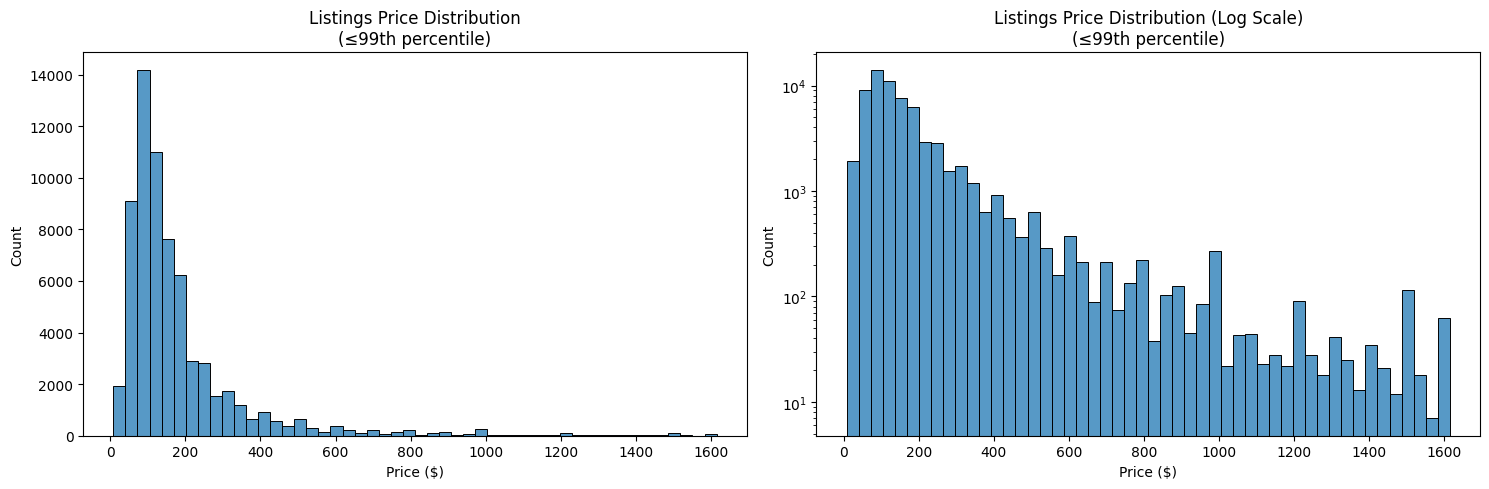

In [2]:
def explore_and_preprocess_data(city_name, date):
    """
    Explore and preprocess data for a given city and date
    """
    print(f"\n=== Data Exploration for {city_name.capitalize()} ({date}) ===\n")
    
    # Load data
    listings, calendar, neighborhoods = load_city_data(city_name, date)
    
    # Clean price data
    listings['price_clean'] = listings['price'].str.replace('$','').str.replace(',','').astype(float)
    calendar['price_clean'] = calendar['price'].str.replace('$','').str.replace(',','').astype(float)
    
    # Price analysis with different percentile cuts
    percentiles = [0.1, 1, 5, 10, 25, 50, 75, 90, 95, 99, 99.9]
    
    print("\nPrice Distribution Analysis:")
    print("\nListings Price Percentiles:")
    for p in percentiles:
        value = listings['price_clean'].quantile(p/100)
        print(f"{p}th percentile: ${value:.2f}")
        
    print("\nCalendar Price Percentiles:")
    for p in percentiles:
        value = calendar['price_clean'].quantile(p/100)
        print(f"{p}th percentile: ${value:.2f}")
    
    # Count extreme values
    print("\nExtreme Value Analysis:")
    price_thresholds = [1000, 2000, 5000, 10000]
    for threshold in price_thresholds:
        n_listings = (listings['price_clean'] > threshold).sum()
        n_calendar = (calendar['price_clean'] > threshold).sum()
        print(f"\nPrices over ${threshold}:")
        print(f"Listings: {n_listings} ({(n_listings/len(listings)*100):.2f}%)")
        print(f"Calendar: {n_calendar} ({(n_calendar/len(calendar)*100):.2f}%)")
    
    # Visualize listings price distributions only (skip calendar for performance)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Full distribution for listings
    sns.histplot(data=listings['price_clean'][listings['price_clean'] <= listings['price_clean'].quantile(0.99)], 
                bins=50, ax=ax1)
    ax1.set_title('Listings Price Distribution\n(≤99th percentile)')
    ax1.set_xlabel('Price ($)')
    
    # Log scale distribution for listings
    sns.histplot(data=listings['price_clean'][listings['price_clean'] <= listings['price_clean'].quantile(0.99)], 
                bins=50, ax=ax2)
    ax2.set_title('Listings Price Distribution (Log Scale)\n(≤99th percentile)')
    ax2.set_xlabel('Price ($)')
    ax2.set_yscale('log')
    
    plt.tight_layout()
    plt.show()
    
    return listings, calendar

# Example usage:
city = "paris"
date = df_dates.loc[city].iloc[2]  # Using the third date (2023-12-12)
listings, calendar = explore_and_preprocess_data(city, date)

In [3]:
# Load data for one city/date as example
city = "amsterdam"
date = "2023-06-05"
listings, calendar, neighborhoods = load_city_data(city, date)

# Basic statistics
def basic_stats(listings_df):
    print("Basic Statistics:")
    print(f"Total number of listings: {len(listings_df)}")
    print(f"Average price: ${listings_df['price'].str.replace('$','').str.replace(',','').astype(float).mean():.2f}")
    print(f"Number of unique neighborhoods: {listings_df['neighbourhood_cleansed'].nunique()}")
    print("\nRoom Type Distribution:")
    print(listings_df['room_type'].value_counts())

# Price distribution
def plot_price_distribution(listings_df):
    plt.figure(figsize=(10,6))
    prices = listings_df['price'].str.replace('$','').str.replace(',','').astype(float)
    sns.histplot(data=prices[prices < prices.quantile(0.99)])  # Removing outliers
    plt.title(f'Price Distribution in {city.capitalize()}')
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.show()

# Neighborhood analysis
def neighborhood_analysis(listings_df):
    neighborhood_stats = listings_df.groupby('neighbourhood_cleansed').agg({
        'id': 'count',
        'price': lambda x: x.str.replace('$','').str.replace(',','').astype(float).mean(),
        'review_scores_rating': 'mean'
    }).round(2)
    
    neighborhood_stats.columns = ['Number of Listings', 'Average Price', 'Average Rating']
    return neighborhood_stats.sort_values('Number of Listings', ascending=False)

In [4]:
def analyze_temporal_patterns(calendar_df):
    calendar_df['date'] = pd.to_datetime(calendar_df['date'])
    calendar_df['price'] = calendar_df['price'].str.replace('$','').str.replace(',','').astype(float)
    
    # Average price by day of week
    calendar_df['day_of_week'] = calendar_df['date'].dt.day_name()
    daily_prices = calendar_df.groupby('day_of_week')['price'].mean()
    
    # Availability patterns
    calendar_df['is_available'] = calendar_df['available'].map({'t': 1, 'f': 0})
    availability = calendar_df.groupby('date')['is_available'].mean()
    
    return daily_prices, availability

In [5]:
def compare_cities(cities, date):
    city_stats = {}
    for city in cities:
        listings, _, _ = load_city_data(city, date)
        city_stats[city] = {
            'avg_price': listings['price'].str.replace('$','').str.replace(',','').astype(float).mean(),
            'num_listings': len(listings),
            'avg_rating': listings['review_scores_rating'].mean()
        }
    return pd.DataFrame(city_stats).T

=== Analysis of Most Recent Data for Each City ===


AMSTERDAM - Data from 2024-09-05
--------------------------------------------------
Basic Statistics:
Total number of listings: 9659
Average price: $289.64
Number of unique neighborhoods: 22

Room Type Distribution:
room_type
Entire home/apt    7776
Private room       1789
Hotel room           56
Shared room          38
Name: count, dtype: int64


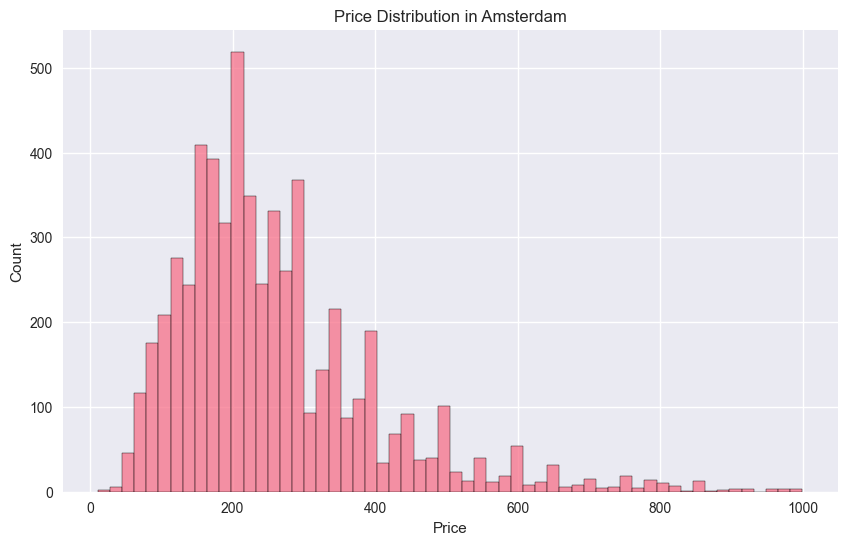


Top 5 Neighborhoods by Number of Listings:
                         Number of Listings  Average Price  Average Rating
neighbourhood_cleansed                                                    
De Baarsjes - Oud-West                 1655         282.50            4.86
De Pijp - Rivierenbuurt                1102         435.56            4.85
Centrum-West                           1084         319.30            4.81
Centrum-Oost                            855         302.49            4.81
Zuid                                    671         300.79            4.87


BARCELONA - Data from 2024-09-06
--------------------------------------------------
Basic Statistics:
Total number of listings: 19482
Average price: $168.63
Number of unique neighborhoods: 71

Room Type Distribution:
room_type
Entire home/apt    11589
Private room        7615
Shared room          160
Hotel room           118
Name: count, dtype: int64


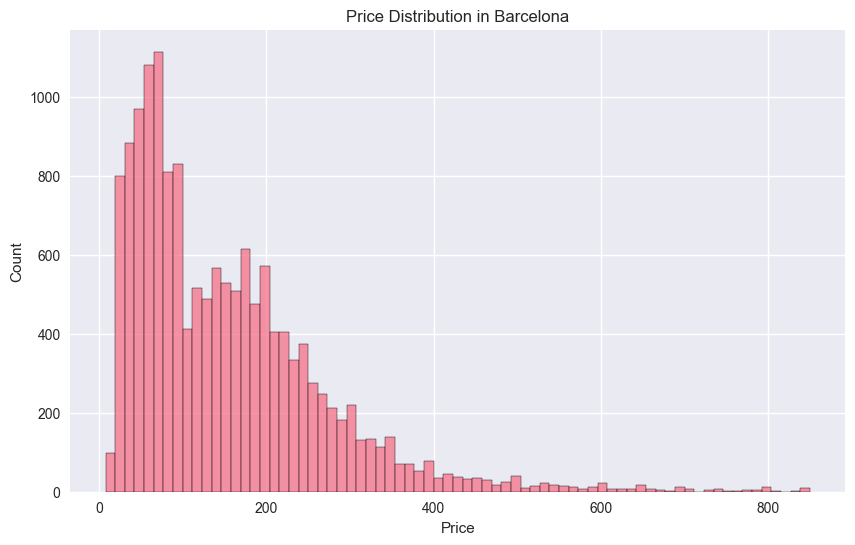


Top 5 Neighborhoods by Number of Listings:
                                       Number of Listings  Average Price  \
neighbourhood_cleansed                                                     
la Dreta de l'Eixample                               2359         231.60   
el Raval                                             1566         125.11   
el Barri Gòtic                                       1265         166.40   
Sant Pere, Santa Caterina i la Ribera                1219         132.63   
la Sagrada Família                                   1136         188.92   

                                       Average Rating  
neighbourhood_cleansed                                 
la Dreta de l'Eixample                           4.64  
el Raval                                         4.51  
el Barri Gòtic                                   4.56  
Sant Pere, Santa Caterina i la Ribera            4.58  
la Sagrada Família                               4.61  


BERLIN - Data from 2024-06-22

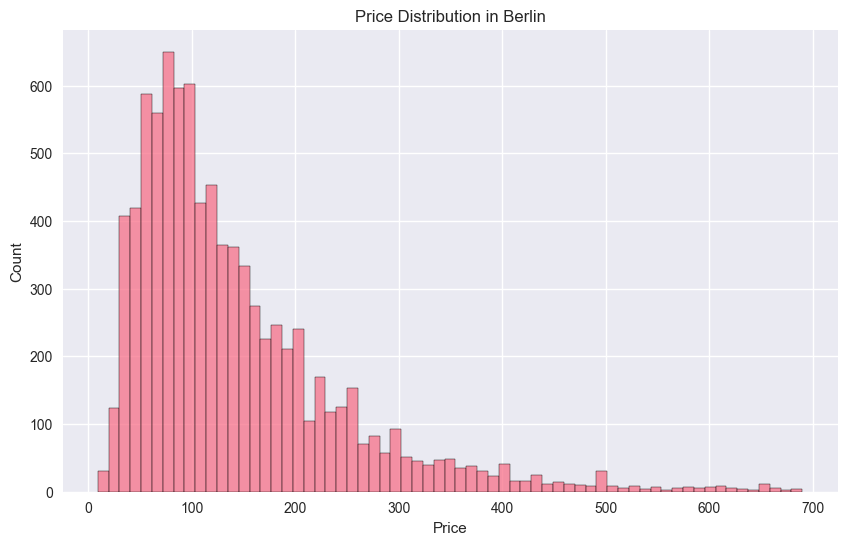


Top 5 Neighborhoods by Number of Listings:
                          Number of Listings  Average Price  Average Rating
neighbourhood_cleansed                                                     
Alexanderplatz                           879         249.90            4.71
Frankfurter Allee Süd FK                 785         158.34            4.80
Tempelhofer Vorstadt                     656         137.14            4.76
Brunnenstr. Süd                          538         216.05            4.80
Reuterstraße                             459         126.66            4.79


LONDON - Data from 2024-09-06
--------------------------------------------------
Basic Statistics:
Total number of listings: 96182
Average price: $197.15
Number of unique neighborhoods: 33

Room Type Distribution:
room_type
Entire home/apt    61321
Private room       34236
Shared room          437
Hotel room           188
Name: count, dtype: int64


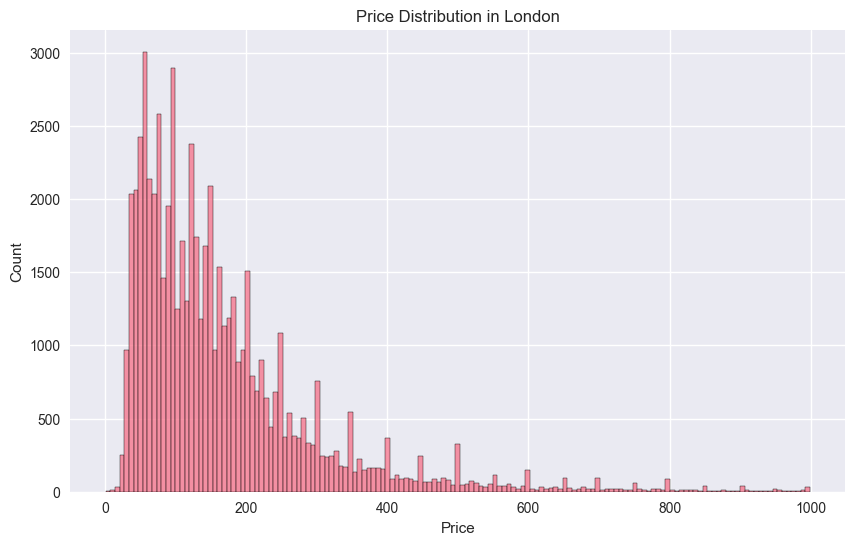


Top 5 Neighborhoods by Number of Listings:
                        Number of Listings  Average Price  Average Rating
neighbourhood_cleansed                                                   
Westminster                          10713         315.28            4.61
Tower Hamlets                         7697         153.95            4.64
Hackney                               6427         155.58            4.77
Kensington and Chelsea                6417         324.94            4.66
Camden                                6377         215.06            4.63


PARIS - Data from 2024-09-06
--------------------------------------------------
Basic Statistics:
Total number of listings: 95461
Average price: $256.02
Number of unique neighborhoods: 20

Room Type Distribution:
room_type
Entire home/apt    85268
Private room        9055
Hotel room           752
Shared room          386
Name: count, dtype: int64


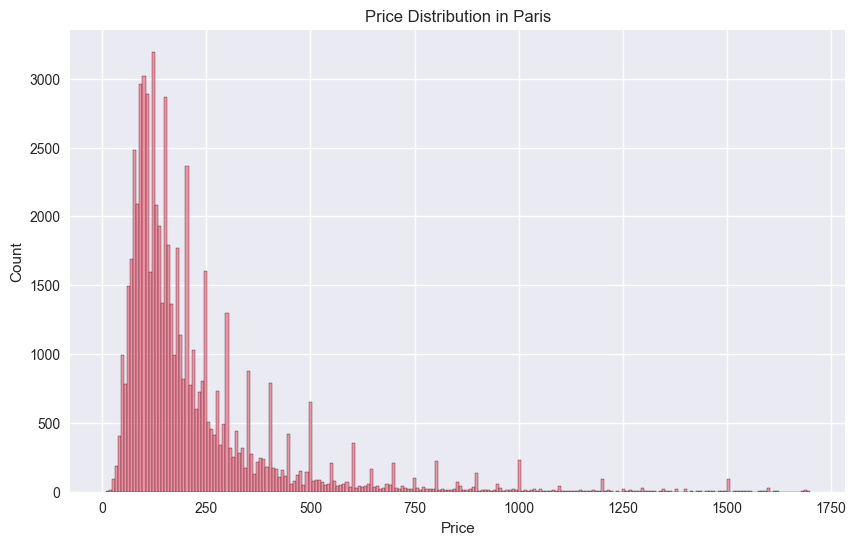


Top 5 Neighborhoods by Number of Listings:
                        Number of Listings  Average Price  Average Rating
neighbourhood_cleansed                                                   
Buttes-Montmartre                    10532         179.00            4.74
Popincourt                            8392         210.76            4.74
Vaugirard                             7727         245.56            4.71
Batignolles-Monceau                   6673         265.82            4.70
Entrepôt                              6464         217.84            4.73


ROME - Data from 2024-09-11
--------------------------------------------------
Basic Statistics:
Total number of listings: 34061
Average price: $213.21
Number of unique neighborhoods: 15

Room Type Distribution:
room_type
Entire home/apt    24912
Private room        8496
Hotel room           497
Shared room          156
Name: count, dtype: int64


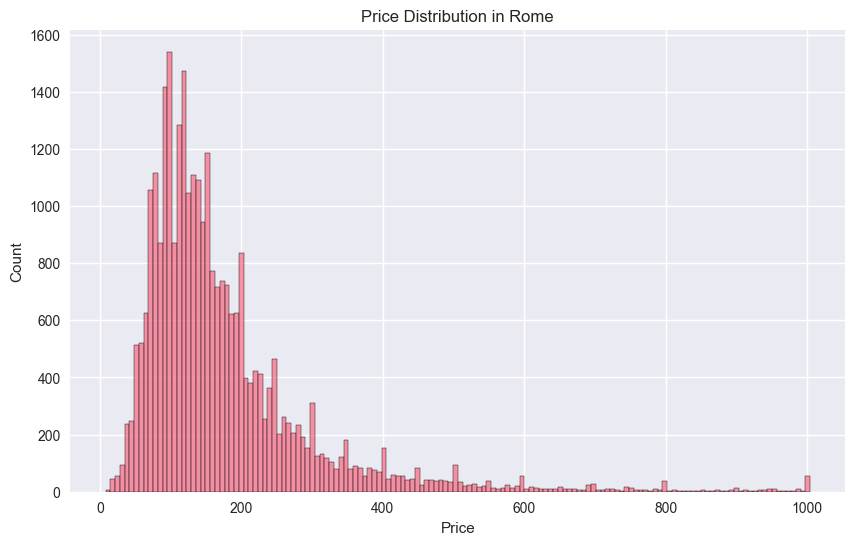


Top 5 Neighborhoods by Number of Listings:
                            Number of Listings  Average Price  Average Rating
neighbourhood_cleansed                                                       
I Centro Storico                         17192         259.52            4.73
VII San Giovanni/Cinecittà                2748         179.33            4.77
II Parioli/Nomentano                      2448         160.48            4.73
XIII Aurelia                              2205         192.97            4.78
XII Monte Verde                           1798         170.31            4.76



In [6]:
# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Compare most recent data for all cities
print("=== Analysis of Most Recent Data for Each City ===\n")
for city in df_dates.index:
    most_recent_date = df_dates.loc[city].dropna().iloc[-1]
    print(f"\n{city.upper()} - Data from {most_recent_date}")
    print("-" * 50)
    
    try:
        # Load data using provided function
        listings, calendar, neighborhoods = load_city_data(city, most_recent_date)
        
        # Run basic statistics
        basic_stats(listings)
        
        # Plot price distribution
        plot_price_distribution(listings)
        
        # Get neighborhood analysis
        print("\nTop 5 Neighborhoods by Number of Listings:")
        print(neighborhood_analysis(listings).head())
        
    except Exception as e:
        print(f"Error processing {city}: {e}")
    
    print("\n" + "="*50)


In [9]:
def analyze_city_prices(city_name):
    """
    Analyze and plot daily average prices for a given city across all available dates
    Parameters:
        city_name (str): Name of the city to analyze
    """
    city_dates = df_dates.loc[city_name].dropna()
    
    print(f"\n=== Analyzing {city_name.capitalize()} ===")
    
    for date in city_dates:
        try:
            # Load data
            listings, calendar, neighborhoods = load_city_data(city_name, date)
            
            # Process calendar data
            calendar['date'] = pd.to_datetime(calendar['date'])
            calendar['price'] = calendar['price'].str.replace('$','').str.replace(',','').astype(float)
            
            # Filter dates - keep only 365 days from scrape date
            scrape_date = pd.to_datetime(date)
            max_date = scrape_date + pd.DateOffset(years=1)
            calendar = calendar[calendar['date'] <= max_date]
            
            # Calculate daily average price
            daily_avg = calendar.groupby('date')['price'].mean().reset_index()
            
            # Create the plot
            plt.figure(figsize=(12,6))
            plt.plot(daily_avg['date'], daily_avg['price'], linewidth=2)
            plt.title(f'Average Daily Price in {city_name.capitalize()} (Data from {date})')
            plt.xlabel('Date')
            plt.ylabel('Average Price ($)')
            plt.grid(True)
            plt.xticks(rotation=45)
            
            # Add overall average line
            avg_price = daily_avg['price'].mean()
            plt.axhline(y=avg_price, color='r', linestyle='--', alpha=0.5)
            plt.text(daily_avg['date'].iloc[0], avg_price*1.1, 
                    f'Overall Average: ${avg_price:.2f}', 
                    color='r')
            
            plt.tight_layout()
            plt.show()
            
            # Print statistics
            print(f"\nStatistics for data from {date}:")
            print(f"Date range: {daily_avg['date'].min().strftime('%Y-%m-%d')} to {daily_avg['date'].max().strftime('%Y-%m-%d')}")
            print(f"Average daily price: ${daily_avg['price'].mean():.2f}")
            print(f"Minimum daily average: ${daily_avg['price'].min():.2f}")
            print(f"Maximum daily average: ${daily_avg['price'].max():.2f}")
            print(f"Standard deviation: ${daily_avg['price'].std():.2f}")
            
        except Exception as e:
            print(f"Error processing {city_name} for date {date}: {e}")
            
        print("-" * 50)


=== Analyzing Paris ===


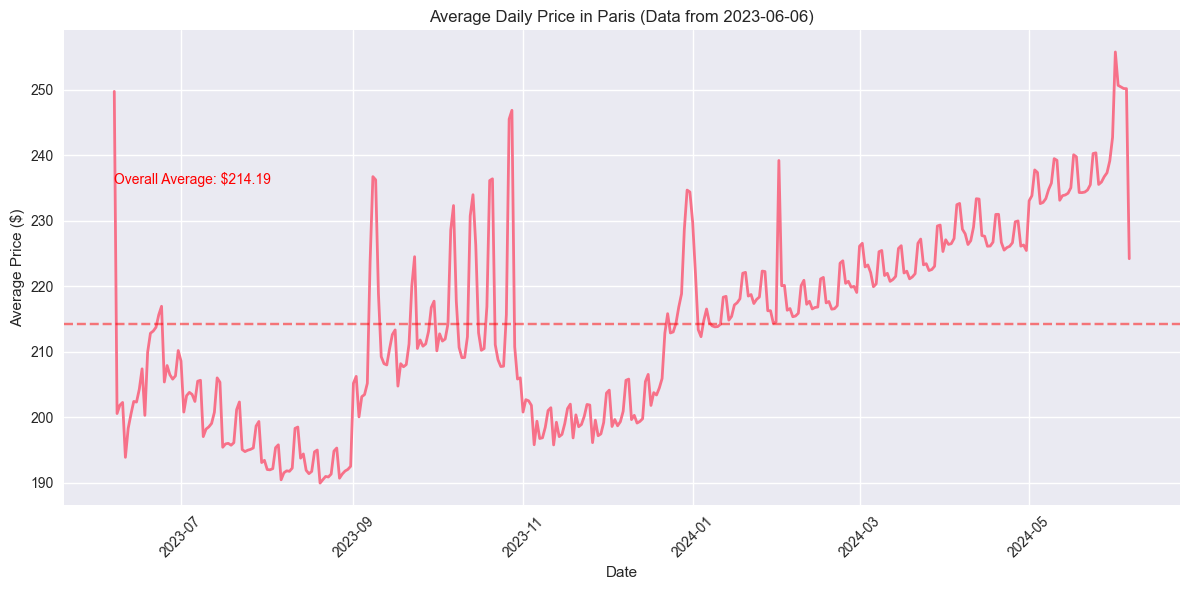


Statistics for data from 2023-06-06:
Date range: 2023-06-07 to 2024-06-06
Average daily price: $214.19
Minimum daily average: $189.96
Maximum daily average: $255.80
Standard deviation: $14.50
--------------------------------------------------


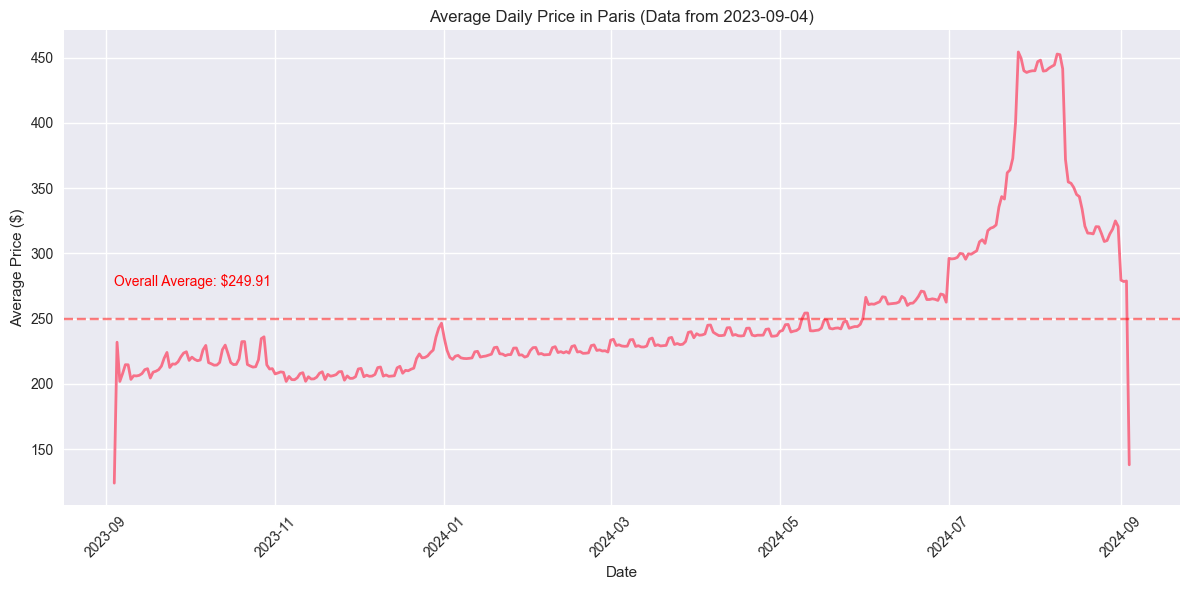


Statistics for data from 2023-09-04:
Date range: 2023-09-04 to 2024-09-04
Average daily price: $249.91
Minimum daily average: $123.90
Maximum daily average: $454.31
Standard deviation: $56.68
--------------------------------------------------


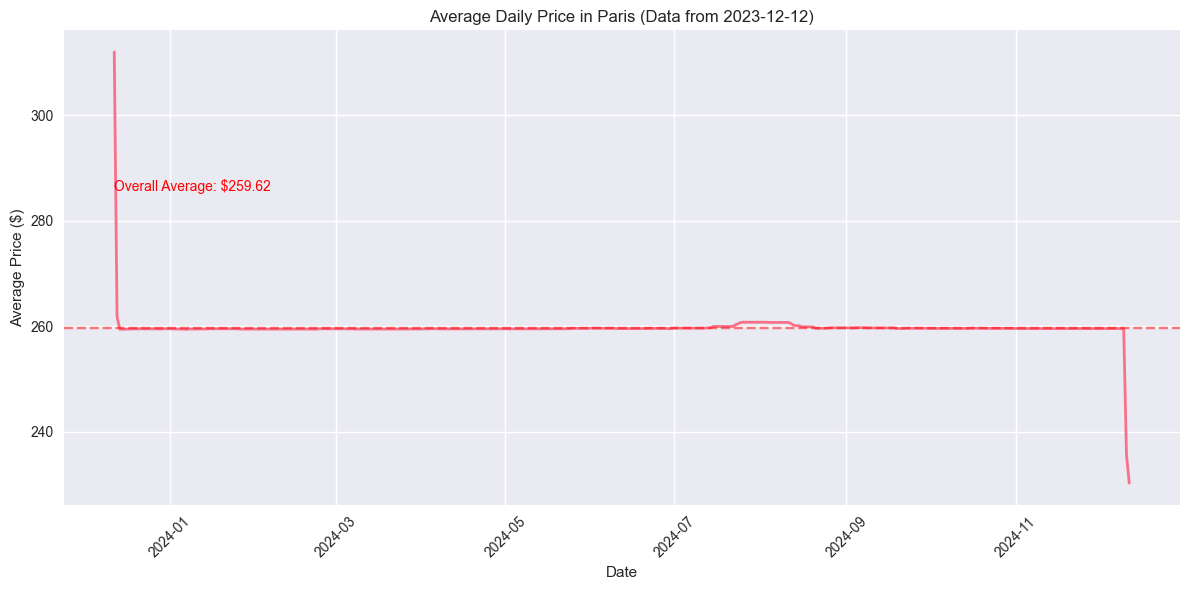


Statistics for data from 2023-12-12:
Date range: 2023-12-12 to 2024-12-12
Average daily price: $259.62
Minimum daily average: $230.20
Maximum daily average: $312.04
Standard deviation: $3.40
--------------------------------------------------


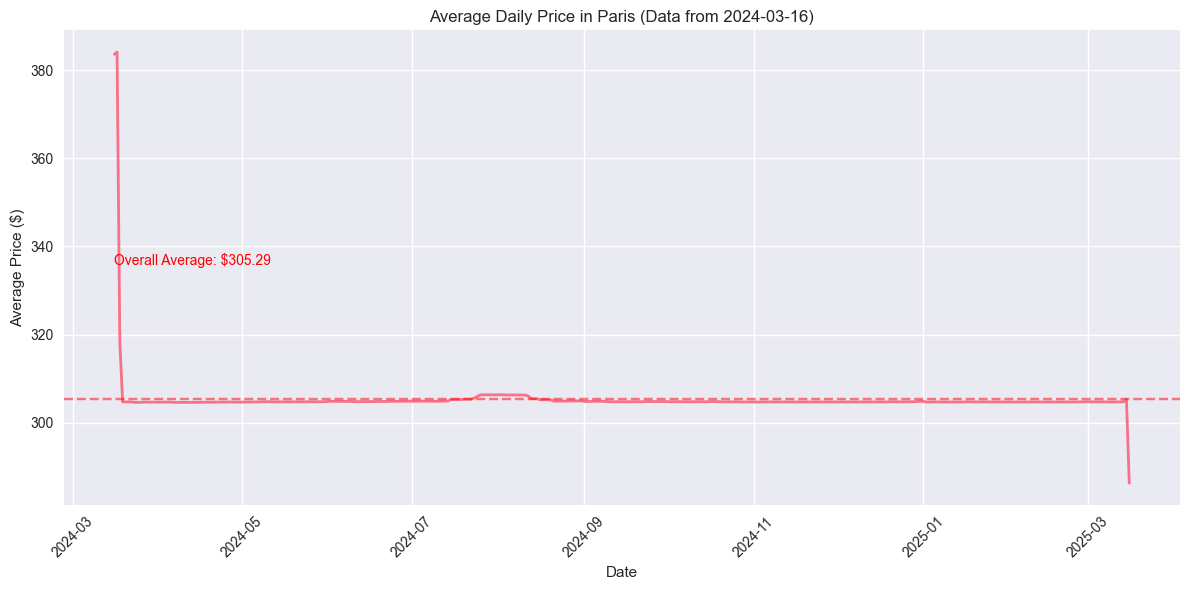


Statistics for data from 2024-03-16:
Date range: 2024-03-16 to 2025-03-16
Average daily price: $305.29
Minimum daily average: $286.29
Maximum daily average: $384.13
Standard deviation: $5.97
--------------------------------------------------


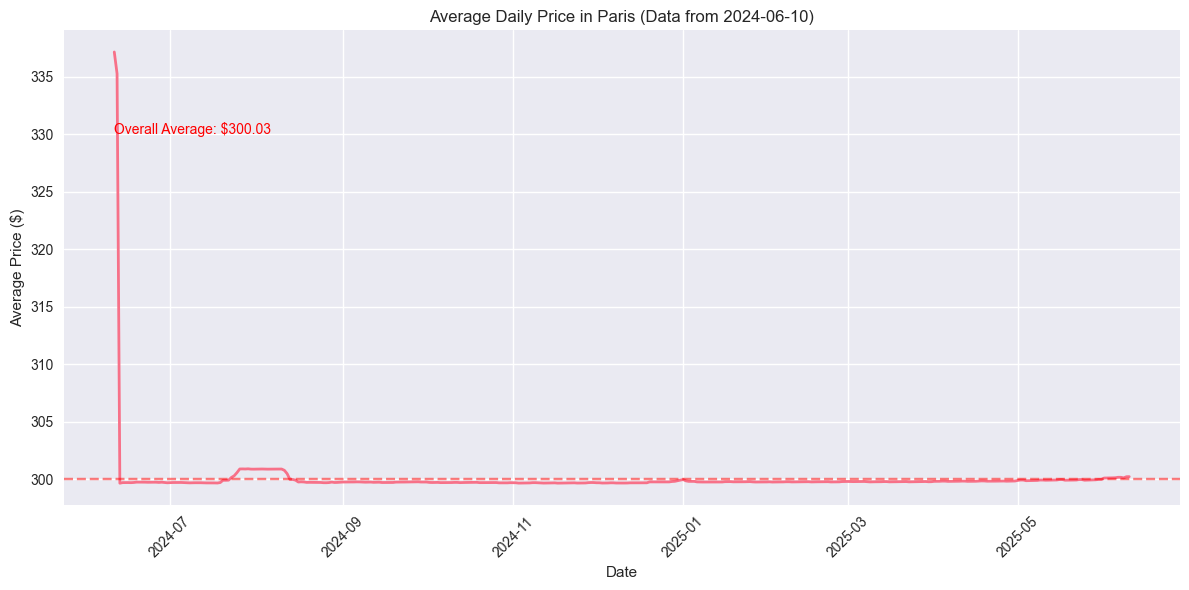


Statistics for data from 2024-06-10:
Date range: 2024-06-11 to 2025-06-10
Average daily price: $300.03
Minimum daily average: $299.65
Maximum daily average: $337.13
Standard deviation: $2.70
--------------------------------------------------


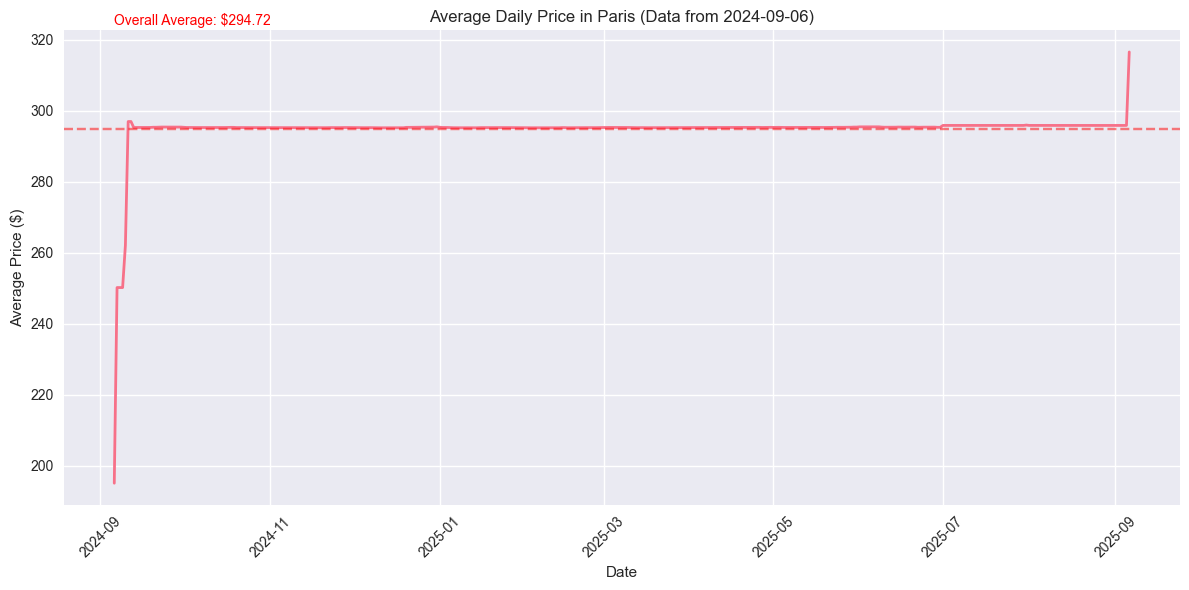


Statistics for data from 2024-09-06:
Date range: 2024-09-06 to 2025-09-06
Average daily price: $294.72
Minimum daily average: $195.07
Maximum daily average: $316.56
Standard deviation: $6.95
--------------------------------------------------


In [10]:
analyze_city_prices("paris")